In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.nonparametric.smoothers_lowess import lowess

# LOCM2 acceptance rate

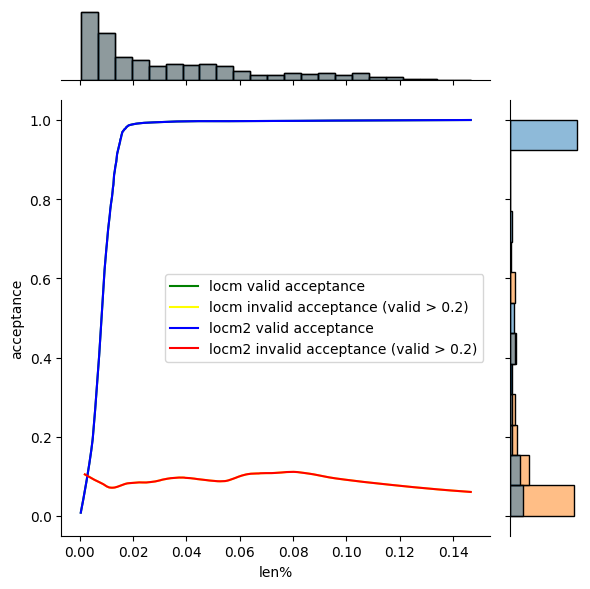

In [4]:


# Read and clean
df_l2 = pd.read_csv('../../output/total/acceptance_rate.csv')
df_l2.columns = df_l2.columns.str.strip()
df_l2 = df_l2.sort_values(by='len%')

# Apply LOWESS to full valid_exe
valid_smoothed_l2 = lowess(df_l2['acceptance_rate'], df_l2['len%'], frac=0.3)
filtered_df_l2 = df_l2[df_l2['acceptance_rate'] > 0.3]
invalid_smoothed_l2 = lowess(filtered_df_l2['invalid_acceptance_rate'], filtered_df_l2['len%'], frac=0.3)

# Combine into dataframe for seaborn
df_long_l2 = pd.melt(df_l2, id_vars=['len%'], value_vars=['acceptance_rate', 'invalid_acceptance_rate'],
                  var_name='type', value_name='acceptance')

# Plot using seaborn
g1 = sns.jointplot(
    data=df_long_l2, x='len%', y='acceptance', hue='type',
    kind='hist', alpha=0, height=6, marginal_kws=dict(common_norm=False)
)

df_l = pd.read_csv('../../output/total/locm_acceptance_rate.csv')
df_l.columns = df_l.columns.str.strip()
df_l = df_l.sort_values(by='len%')
# Apply LOWESS to full locm_exe
valid_smoothed_l = lowess(df_l['acceptance_rate'], df_l['len%'], frac=0.3)
filtered_df_l = df_l[df_l['acceptance_rate'] > 0.2]
invalid_smoothed_l = lowess(filtered_df_l['invalid_acceptance_rate'], filtered_df_l['len%'], frac=0.3)

# Overlay LOWESS lines
plt.plot(valid_smoothed_l2[:, 0], valid_smoothed_l2[:, 1], label='locm valid acceptance', color='green')
plt.plot(invalid_smoothed_l2[:, 0], invalid_smoothed_l2[:, 1], label='locm invalid acceptance (valid > 0.2)', color='yellow')

plt.plot(valid_smoothed_l2[:, 0], valid_smoothed_l2[:, 1], label='locm2 valid acceptance', color='blue')
plt.plot(invalid_smoothed_l2[:, 0], invalid_smoothed_l2[:, 1], label='locm2 invalid acceptance (valid > 0.2)', color='red')



plt.legend()
plt.tight_layout()
plt.show()


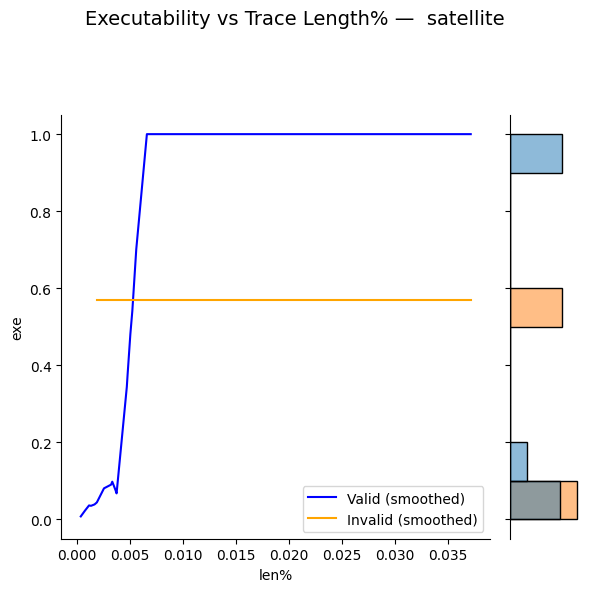

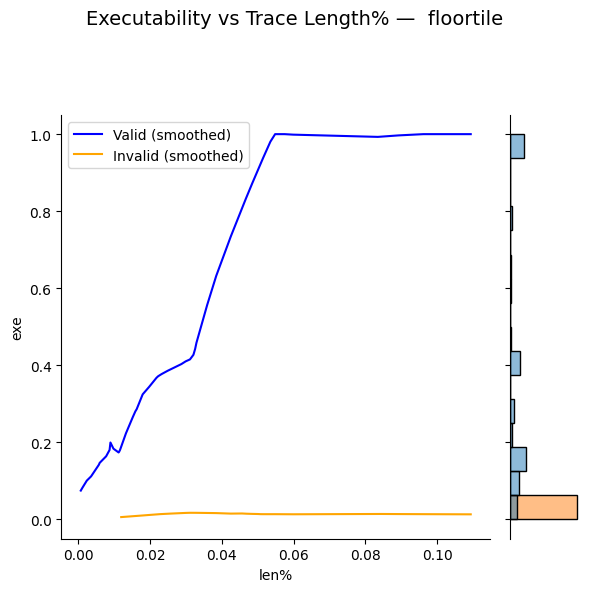

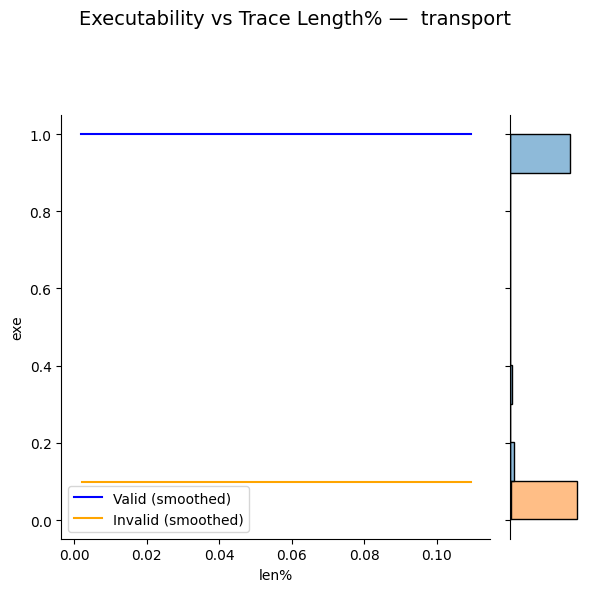

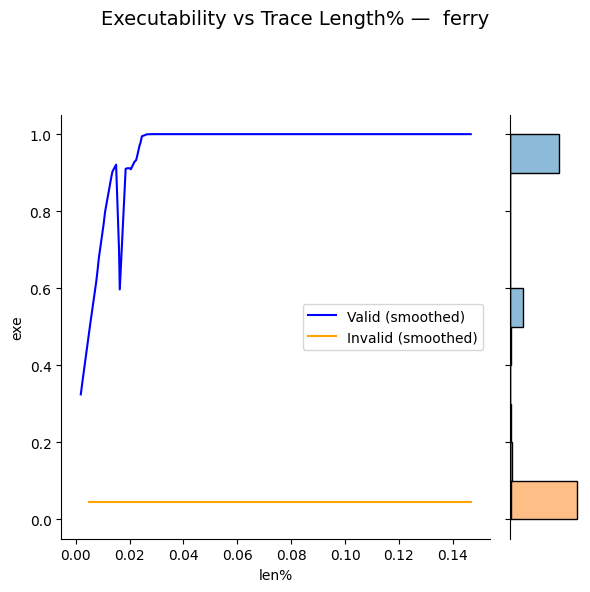

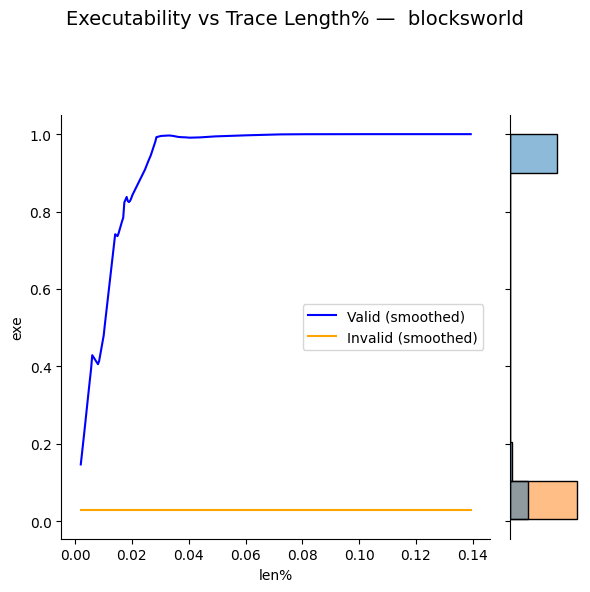

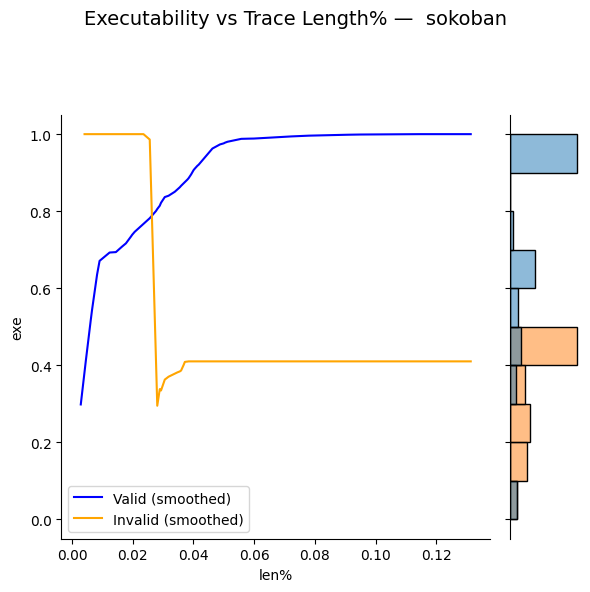

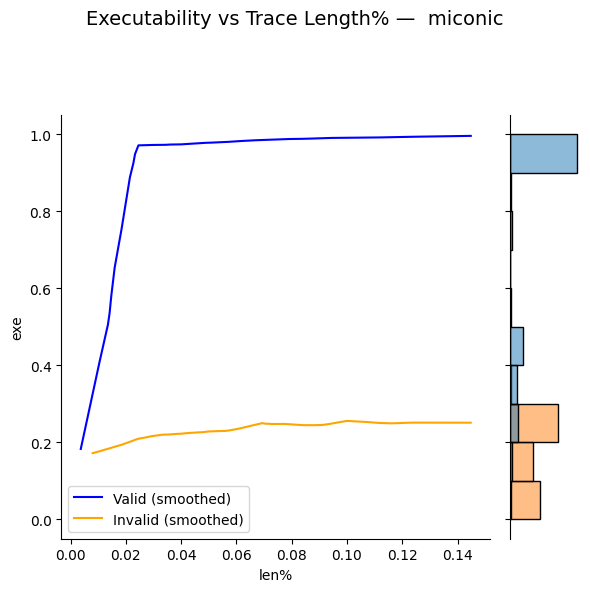

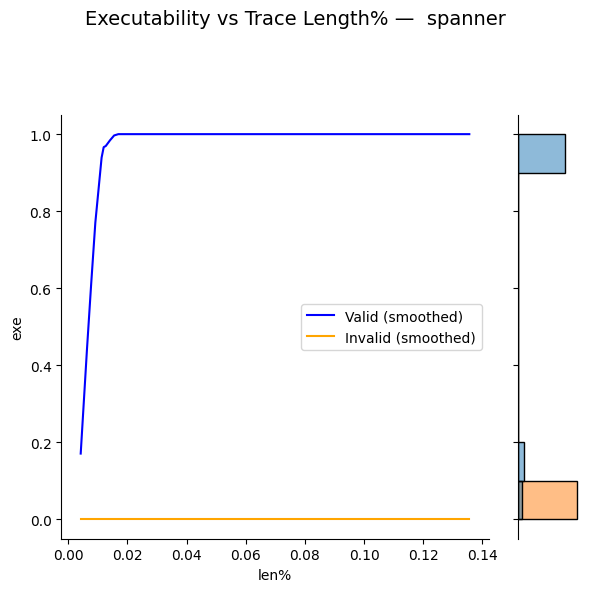

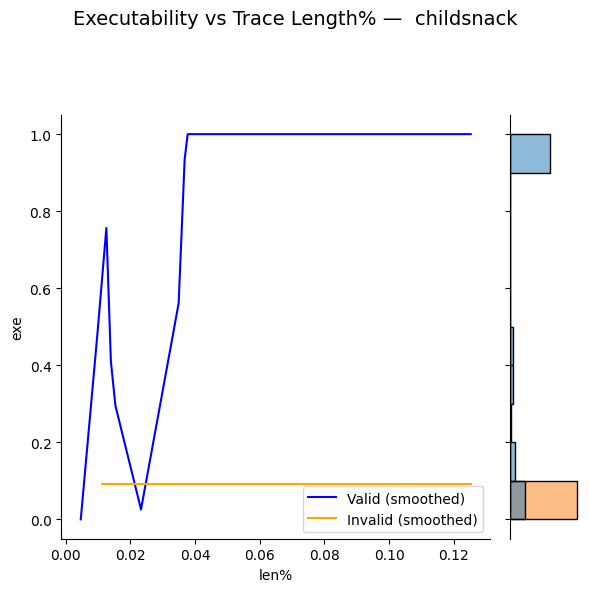

In [3]:


# Get unique domains
domains = df_l2['Domain'].unique()

for domain in domains:
    domain_df = df_l2[df_l2['Domain'] == domain].copy()

    # Apply LOWESS smoothing
    valid_smoothed = lowess(domain_df['valid_acceptance'], domain_df['len%'], frac=0.3)
    filtered_df = domain_df[domain_df['valid_acceptance'] > 0.6]
    invalid_smoothed = lowess(filtered_df['invalid_acceptance'], filtered_df['len%'], frac=0.3)

    valid_smoothed[:, 1] = valid_smoothed[:, 1].clip(0, 1)
    invalid_smoothed[:, 1] = invalid_smoothed[:, 1].clip(0, 1)

    # Melt to long format for seaborn
    df_long = pd.melt(
        domain_df,
        id_vars=['len%'],
        value_vars=['valid_acceptance', 'invalid_acceptance'],
        var_name='type',
        value_name='exe'
    )

    # Create jointplot
    g = sns.jointplot(
        data=df_long,
        x='len%', y='exe', hue='type',
        kind='hist', alpha=0,
        height=6, marginal_kws=dict(common_norm=False)
    )
    g.ax_marg_x.set_visible(False)

    # Overlay LOWESS lines
    g.ax_joint.plot(valid_smoothed[:, 0], valid_smoothed[:, 1], color='blue', label='Valid (smoothed)')
    g.ax_joint.plot(invalid_smoothed[:, 0], invalid_smoothed[:, 1], color='orange', label='Invalid (smoothed)')
    g.ax_joint.legend()

    # Add title
    g.fig.suptitle(f"Executability vs Trace Length% — {domain}", fontsize=14)
    g.fig.tight_layout()
    g.fig.subplots_adjust(top=0.95)

    # Show the plot
    plt.show()
